=== Sistema de Recomendación con Técnicas No Supervisadas ===
Trabajo Computacional #1 - IA 2025-1
Grupo 5: Abarca, Echevarria, Cuadros

1. Creando datos de muestra...
Datos creados: 100 usuarios, 20 películas
Matriz de calificaciones: (100, 20)

2. Entrenando modelos...
K-Means completado:
- Número de clusters: 3
- Silhouette Score: 0.115
NMF completado:
- Componentes latentes: 5
- RMSE: 1.656
- Error de reconstrucción: 58.696

3. Evaluando sistema...
Evaluando sistema de recomendación...
K-Means completado:
- Número de clusters: 3
- Silhouette Score: 0.097
NMF completado:
- Componentes latentes: 5
- RMSE: 1.909
- Error de reconstrucción: 57.955
RMSE cluster: 1.239
RMSE nmf: 3.114
RMSE hybrid: 2.138

4. Generando recomendaciones...

=== Recomendaciones para Usuario 1 ===
Películas ya vistas (2):
  - Pulp Fiction: 5.0/5
  - Goodfellas: 3.0/5

Recomendaciones Híbridas:
1. The Godfather (1972) - Crime
   Puntuación: 0.610
2. Jaws (1975) - Thriller
   Puntuación: 0.406
3. Jurassic Park (1

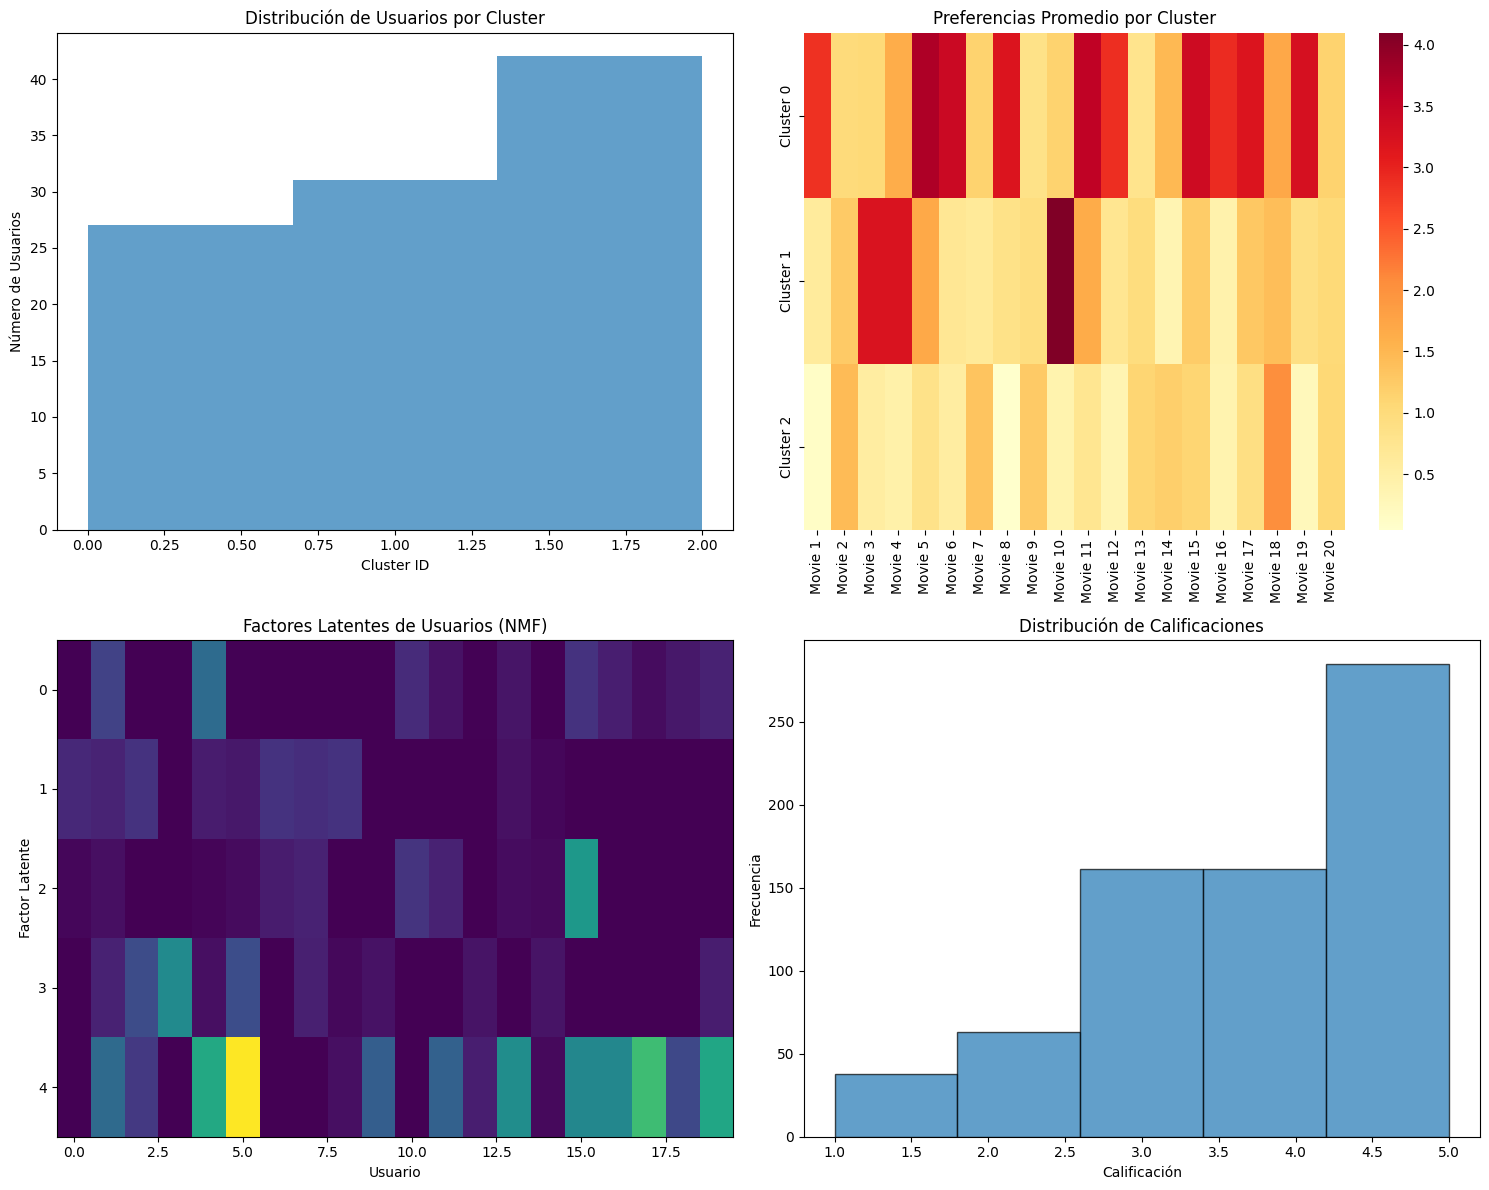


6. Análisis Comparativo de Métodos:

Comparando métodos para Usuario 1:

--- Método: CLUSTER ---

=== Recomendaciones para Usuario 1 ===
Películas ya vistas (2):
  - Pulp Fiction: 5.0/5
  - Goodfellas: 3.0/5

Recomendaciones basadas en Clustering:
1. Rocky (1976) - Drama
   Puntuación: 4.400
2. The Godfather (1972) - Crime
   Puntuación: 4.348
3. Forrest Gump (1994) - Drama
   Puntuación: 4.333
4. The Dark Knight (2008) - Action
   Puntuación: 4.250
5. Jaws (1975) - Thriller
   Puntuación: 4.000

--- Método: NMF ---

=== Recomendaciones para Usuario 1 ===
Películas ya vistas (2):
  - Pulp Fiction: 5.0/5
  - Goodfellas: 3.0/5

Recomendaciones basadas en Matrix Factorization:
1. The Godfather (1972) - Crime
   Puntuación: 2.188
2. Jaws (1975) - Thriller
   Puntuación: 0.721
3. Jurassic Park (1993) - Adventure
   Puntuación: 0.685
4. Forrest Gump (1994) - Drama
   Puntuación: 0.232
5. Inception (2010) - Sci-Fi
   Puntuación: 0.151

--- Método: HYBRID ---

=== Recomendaciones para Usuario

In [1]:
#!/usr/bin/env python3
"""
Sistema de Recomendación con Técnicas de Aprendizaje No Supervisado
Trabajo Computacional #1 - Inteligencia Artificial 2025-1
Grupo 5: Abarca Aranda Jose, Echevarria Narrea Marco, Cuadros Alvino Ricardo

Este sistema implementa dos técnicas principales:
1. K-Means Clustering para agrupar usuarios similares
2. Non-negative Matrix Factorization (NMF) para factorización de matrices
3. Sistema híbrido que combina ambas técnicas
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF
from sklearn.metrics import mean_squared_error, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

class RecommendationSystem:
    """
    Sistema de recomendación híbrido que utiliza K-Means y Matrix Factorization
    """

    def __init__(self, n_clusters=3, n_components=5, random_state=42):
        """
        Inicializa el sistema de recomendación

        Parameters:
        -----------
        n_clusters : int
            Número de clusters para K-Means
        n_components : int
            Número de componentes latentes para NMF
        random_state : int
            Semilla para reproducibilidad
        """
        self.n_clusters = n_clusters
        self.n_components = n_components
        self.random_state = random_state

        # Modelos
        self.kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10)
        self.nmf = NMF(n_components=n_components, random_state=random_state, max_iter=200)

        # Datos
        self.ratings_matrix = None
        self.user_features = None
        self.movie_features = None
        self.user_clusters = None
        self.scaler = StandardScaler()

    def create_sample_data(self):
        """
        Crea datos de muestra para demostración
        """
        # Crear datos de películas
        movies_data = {
            'movie_id': range(1, 21),
            'title': [
                'The Matrix', 'Titanic', 'The Godfather', 'Pulp Fiction', 'Forrest Gump',
                'Inception', 'The Shawshank Redemption', 'Avatar', 'Casablanca', 'Goodfellas',
                'The Dark Knight', 'Star Wars', 'Jurassic Park', 'The Lion King', 'Terminator 2',
                'Back to the Future', 'Aliens', 'Rocky', 'E.T.', 'Jaws'
            ],
            'genre': [
                'Sci-Fi', 'Romance', 'Crime', 'Crime', 'Drama',
                'Sci-Fi', 'Drama', 'Sci-Fi', 'Romance', 'Crime',
                'Action', 'Sci-Fi', 'Adventure', 'Animation', 'Action',
                'Sci-Fi', 'Action', 'Drama', 'Sci-Fi', 'Thriller'
            ],
            'year': [
                1999, 1997, 1972, 1994, 1994,
                2010, 1994, 2009, 1942, 1990,
                2008, 1977, 1993, 1994, 1991,
                1985, 1986, 1976, 1982, 1975
            ]
        }

        self.movies_df = pd.DataFrame(movies_data)

        # Crear datos de usuarios
        users_data = {
            'user_id': range(1, 101),
            'age': np.random.randint(18, 65, 100),
            'gender': np.random.choice(['M', 'F'], 100),
            'occupation': np.random.choice(['Student', 'Engineer', 'Teacher', 'Doctor', 'Artist'], 100)
        }

        self.users_df = pd.DataFrame(users_data)

        # Crear matriz de calificaciones con patrones realistas
        np.random.seed(self.random_state)
        self.ratings_matrix = self._generate_realistic_ratings()

        print(f"Datos creados: {len(self.users_df)} usuarios, {len(self.movies_df)} películas")
        print(f"Matriz de calificaciones: {self.ratings_matrix.shape}")

    def _generate_realistic_ratings(self):
        """
        Genera una matriz de calificaciones realista con patrones de preferencia
        """
        n_users, n_movies = len(self.users_df), len(self.movies_df)
        ratings = np.zeros((n_users, n_movies))

        # Definir perfiles de usuario basados en géneros
        genre_preferences = {
            'Sci-Fi': [0, 4, 5, 7, 10, 11, 14, 15, 16, 18],
            'Crime': [2, 3, 9],
            'Drama': [4, 6, 17],
            'Romance': [1, 8],
            'Action': [10, 14, 16, 17],
            'Adventure': [12],
            'Animation': [13],
            'Thriller': [19]
        }

        # Asignar preferencias aleatorias a usuarios
        for user_idx in range(n_users):
            # Cada usuario prefiere 2-3 géneros
            preferred_genres = np.random.choice(list(genre_preferences.keys()),
                                              size=np.random.randint(2, 4),
                                              replace=False)

            for genre in preferred_genres:
                movie_indices = genre_preferences[genre]
                for movie_idx in movie_indices:
                    if np.random.random() > 0.3:  # 70% probabilidad de calificar
                        # Calificaciones más altas para géneros preferidos
                        rating = np.random.choice([3, 4, 5], p=[0.2, 0.3, 0.5])
                        ratings[user_idx, movie_idx] = rating

            # Agregar algunas calificaciones aleatorias para otros géneros
            other_movies = [i for i in range(n_movies)
                          if i not in [idx for genre in preferred_genres
                                     for idx in genre_preferences[genre]]]

            # Calificar algunas películas de otros géneros con puntuaciones más bajas
            n_other_ratings = np.random.randint(2, 6)
            other_sample = np.random.choice(other_movies,
                                          size=min(n_other_ratings, len(other_movies)),
                                          replace=False)

            for movie_idx in other_sample:
                if np.random.random() > 0.6:  # 40% probabilidad
                    rating = np.random.choice([1, 2, 3], p=[0.3, 0.4, 0.3])
                    ratings[user_idx, movie_idx] = rating

        return ratings

    def fit_kmeans(self, user_features=None):
        """
        Entrena el modelo K-Means para clustering de usuarios

        Parameters:
        -----------
        user_features : array-like, optional
            Características de usuarios. Si no se proporciona, usa la matriz de calificaciones
        """
        if user_features is None:
            # Usar matriz de calificaciones como características
            features = self.ratings_matrix
        else:
            features = user_features

        # Normalizar características
        features_scaled = self.scaler.fit_transform(features)

        # Entrenar K-Means
        self.user_clusters = self.kmeans.fit_predict(features_scaled)

        # Calcular métricas
        silhouette_avg = silhouette_score(features_scaled, self.user_clusters)

        print(f"K-Means completado:")
        print(f"- Número de clusters: {self.n_clusters}")
        print(f"- Silhouette Score: {silhouette_avg:.3f}")

        return self.user_clusters

    def fit_nmf(self):
        """
        Entrena el modelo NMF para factorización de matrices
        """
        # Entrenar NMF
        self.user_features = self.nmf.fit_transform(self.ratings_matrix)
        self.movie_features = self.nmf.components_

        # Reconstruir matriz para evaluar
        reconstructed = np.dot(self.user_features, self.movie_features)

        # Calcular error solo en entradas no nulas
        mask = self.ratings_matrix > 0
        mse = mean_squared_error(self.ratings_matrix[mask], reconstructed[mask])
        rmse = np.sqrt(mse)

        print(f"NMF completado:")
        print(f"- Componentes latentes: {self.n_components}")
        print(f"- RMSE: {rmse:.3f}")
        print(f"- Error de reconstrucción: {self.nmf.reconstruction_err_:.3f}")

        return self.user_features, self.movie_features

    def get_cluster_recommendations(self, user_id, n_recommendations=5):
        """
        Genera recomendaciones basadas en clustering

        Parameters:
        -----------
        user_id : int
            ID del usuario (índice en la matriz)
        n_recommendations : int
            Número de recomendaciones a generar
        """
        user_cluster = self.user_clusters[user_id]

        # Encontrar usuarios en el mismo cluster
        cluster_users = np.where(self.user_clusters == user_cluster)[0]
        cluster_users = cluster_users[cluster_users != user_id]  # Excluir al usuario actual

        # Calcular puntuaciones promedio del cluster para películas no vistas
        user_ratings = self.ratings_matrix[user_id]
        unwatched_movies = np.where(user_ratings == 0)[0]

        cluster_scores = []
        for movie_idx in unwatched_movies:
            # Promedio de calificaciones del cluster para esta película
            cluster_ratings = self.ratings_matrix[cluster_users, movie_idx]
            cluster_ratings = cluster_ratings[cluster_ratings > 0]  # Solo calificaciones existentes

            if len(cluster_ratings) > 0:
                avg_rating = np.mean(cluster_ratings)
                cluster_scores.append((movie_idx, avg_rating))

        # Ordenar por puntuación y devolver top-N
        cluster_scores.sort(key=lambda x: x[1], reverse=True)

        return cluster_scores[:n_recommendations]

    def get_nmf_recommendations(self, user_id, n_recommendations=5):
        """
        Genera recomendaciones basadas en factorización de matrices

        Parameters:
        -----------
        user_id : int
            ID del usuario (índice en la matriz)
        n_recommendations : int
            Número de recomendaciones a generar
        """
        # Calcular puntuaciones predichas
        user_vector = self.user_features[user_id]
        predicted_ratings = np.dot(user_vector, self.movie_features)

        # Filtrar películas ya vistas
        user_ratings = self.ratings_matrix[user_id]
        unwatched_movies = np.where(user_ratings == 0)[0]

        # Obtener puntuaciones para películas no vistas
        nmf_scores = [(movie_idx, predicted_ratings[movie_idx])
                      for movie_idx in unwatched_movies]

        # Ordenar por puntuación y devolver top-N
        nmf_scores.sort(key=lambda x: x[1], reverse=True)

        return nmf_scores[:n_recommendations]

    def get_hybrid_recommendations(self, user_id, n_recommendations=5,
                                 cluster_weight=0.4, nmf_weight=0.6):
        """
        Genera recomendaciones híbridas combinando ambas técnicas

        Parameters:
        -----------
        user_id : int
            ID del usuario
        n_recommendations : int
            Número de recomendaciones
        cluster_weight : float
            Peso para recomendaciones de clustering
        nmf_weight : float
            Peso para recomendaciones de NMF
        """
        # Obtener recomendaciones de ambas técnicas
        cluster_recs = dict(self.get_cluster_recommendations(user_id, n_recommendations*2))
        nmf_recs = dict(self.get_nmf_recommendations(user_id, n_recommendations*2))

        # Combinar puntuaciones
        all_movies = set(cluster_recs.keys()) | set(nmf_recs.keys())
        hybrid_scores = []

        for movie_idx in all_movies:
            cluster_score = cluster_recs.get(movie_idx, 0)
            nmf_score = nmf_recs.get(movie_idx, 0)

            # Normalizar puntuaciones (0-5 para cluster, variable para NMF)
            cluster_score_norm = cluster_score / 5.0 if cluster_score > 0 else 0
            nmf_score_norm = min(nmf_score / 5.0, 1.0) if nmf_score > 0 else 0

            # Combinar con pesos
            hybrid_score = (cluster_weight * cluster_score_norm +
                          nmf_weight * nmf_score_norm)

            if hybrid_score > 0:
                hybrid_scores.append((movie_idx, hybrid_score))

        # Ordenar y devolver top-N
        hybrid_scores.sort(key=lambda x: x[1], reverse=True)

        return hybrid_scores[:n_recommendations]

    def evaluate_system(self, test_size=0.2):
        """
        Evalúa el sistema usando validación cruzada

        Parameters:
        -----------
        test_size : float
            Proporción de datos para prueba
        """
        print("Evaluando sistema de recomendación...")

        # Crear máscara para datos de entrenamiento y prueba
        mask = self.ratings_matrix > 0
        indices = np.where(mask)

        # Dividir índices aleatoriamente
        train_indices, test_indices = train_test_split(
            list(zip(indices[0], indices[1])),
            test_size=test_size,
            random_state=self.random_state
        )

        # Crear matriz de entrenamiento
        train_matrix = self.ratings_matrix.copy()
        for user_idx, movie_idx in test_indices:
            train_matrix[user_idx, movie_idx] = 0

        # Entrenar modelos con datos de entrenamiento
        original_matrix = self.ratings_matrix
        self.ratings_matrix = train_matrix

        self.fit_kmeans()
        self.fit_nmf()

        # Evaluar predicciones
        errors = {'cluster': [], 'nmf': [], 'hybrid': []}

        for user_idx, movie_idx in test_indices:
            actual_rating = original_matrix[user_idx, movie_idx]

            # Predicción por clustering
            cluster_recs = dict(self.get_cluster_recommendations(user_idx, 20))
            cluster_pred = cluster_recs.get(movie_idx, 2.5)  # Predicción por defecto

            # Predicción por NMF
            user_vector = self.user_features[user_idx]
            nmf_pred = np.dot(user_vector, self.movie_features[:, movie_idx])

            # Predicción híbrida
            hybrid_recs = dict(self.get_hybrid_recommendations(user_idx, 20))
            hybrid_pred = hybrid_recs.get(movie_idx, 2.5) * 5  # Desnormalizar

            # Calcular errores
            errors['cluster'].append((actual_rating - cluster_pred) ** 2)
            errors['nmf'].append((actual_rating - nmf_pred) ** 2)
            errors['hybrid'].append((actual_rating - hybrid_pred) ** 2)

        # Calcular RMSE
        results = {}
        for method in errors:
            rmse = np.sqrt(np.mean(errors[method]))
            results[method] = rmse
            print(f"RMSE {method}: {rmse:.3f}")

        # Restaurar matriz original
        self.ratings_matrix = original_matrix

        return results

    def visualize_clusters(self):
        """
        Visualiza los clusters de usuarios
        """
        if self.user_clusters is None:
            print("Primero debe entrenar el modelo K-Means")
            return

        # Crear visualización de clusters
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))

        # 1. Distribución de clusters
        axes[0, 0].hist(self.user_clusters, bins=self.n_clusters, alpha=0.7)
        axes[0, 0].set_title('Distribución de Usuarios por Cluster')
        axes[0, 0].set_xlabel('Cluster ID')
        axes[0, 0].set_ylabel('Número de Usuarios')

        # 2. Heatmap de preferencias por cluster
        cluster_preferences = []
        for cluster_id in range(self.n_clusters):
            cluster_users = np.where(self.user_clusters == cluster_id)[0]
            cluster_ratings = self.ratings_matrix[cluster_users].mean(axis=0)
            cluster_preferences.append(cluster_ratings)

        cluster_preferences = np.array(cluster_preferences)
        sns.heatmap(cluster_preferences,
                   xticklabels=[f'Movie {i+1}' for i in range(len(self.movies_df))],
                   yticklabels=[f'Cluster {i}' for i in range(self.n_clusters)],
                   cmap='YlOrRd',
                   ax=axes[0, 1])
        axes[0, 1].set_title('Preferencias Promedio por Cluster')

        # 3. Factores latentes de NMF
        if hasattr(self, 'user_features'):
            axes[1, 0].imshow(self.user_features[:20].T, cmap='viridis', aspect='auto')
            axes[1, 0].set_title('Factores Latentes de Usuarios (NMF)')
            axes[1, 0].set_xlabel('Usuario')
            axes[1, 0].set_ylabel('Factor Latente')

        # 4. Distribución de calificaciones
        ratings_flat = self.ratings_matrix[self.ratings_matrix > 0]
        axes[1, 1].hist(ratings_flat, bins=5, alpha=0.7, edgecolor='black')
        axes[1, 1].set_title('Distribución de Calificaciones')
        axes[1, 1].set_xlabel('Calificación')
        axes[1, 1].set_ylabel('Frecuencia')

        plt.tight_layout()
        plt.show()

    def print_recommendations(self, user_id, method='hybrid'):
        """
        Imprime recomendaciones para un usuario específico

        Parameters:
        -----------
        user_id : int
            ID del usuario
        method : str
            Método de recomendación ('cluster', 'nmf', 'hybrid')
        """
        print(f"\n=== Recomendaciones para Usuario {user_id+1} ===")

        # Mostrar perfil del usuario
        user_ratings = self.ratings_matrix[user_id]
        watched_movies = np.where(user_ratings > 0)[0]

        print(f"Películas ya vistas ({len(watched_movies)}):")
        for movie_idx in watched_movies[:5]:  # Mostrar solo las primeras 5
            movie_title = self.movies_df.iloc[movie_idx]['title']
            rating = user_ratings[movie_idx]
            print(f"  - {movie_title}: {rating}/5")

        if len(watched_movies) > 5:
            print(f"  ... y {len(watched_movies)-5} más")

        # Obtener recomendaciones según el método
        if method == 'cluster':
            recommendations = self.get_cluster_recommendations(user_id)
            print(f"\nRecomendaciones basadas en Clustering:")
        elif method == 'nmf':
            recommendations = self.get_nmf_recommendations(user_id)
            print(f"\nRecomendaciones basadas en Matrix Factorization:")
        else:
            recommendations = self.get_hybrid_recommendations(user_id)
            print(f"\nRecomendaciones Híbridas:")

        for i, (movie_idx, score) in enumerate(recommendations, 1):
            movie_info = self.movies_df.iloc[movie_idx]
            print(f"{i}. {movie_info['title']} ({movie_info['year']}) - {movie_info['genre']}")
            print(f"   Puntuación: {score:.3f}")


def main():
    """
    Función principal para demostrar el sistema
    """
    print("=== Sistema de Recomendación con Técnicas No Supervisadas ===")
    print("Trabajo Computacional #1 - IA 2025-1")
    print("Grupo 5: Abarca, Echevarria, Cuadros\n")

    # Inicializar sistema
    rec_system = RecommendationSystem(n_clusters=3, n_components=5)

    # Crear datos de muestra
    print("1. Creando datos de muestra...")
    rec_system.create_sample_data()

    # Entrenar modelos
    print("\n2. Entrenando modelos...")
    rec_system.fit_kmeans()
    rec_system.fit_nmf()

    # Evaluar sistema
    print("\n3. Evaluando sistema...")
    results = rec_system.evaluate_system()

    # Mostrar recomendaciones para usuarios de ejemplo
    print("\n4. Generando recomendaciones...")

    for user_id in [0, 1, 2]:
        rec_system.print_recommendations(user_id, method='hybrid')
        print("-" * 60)

    # Visualizar resultados
    print("\n5. Generando visualizaciones...")
    rec_system.visualize_clusters()

    # Análisis comparativo
    print("\n6. Análisis Comparativo de Métodos:")
    print("=" * 50)

    test_user = 0

    print(f"\nComparando métodos para Usuario {test_user+1}:")

    methods = ['cluster', 'nmf', 'hybrid']
    for method in methods:
        print(f"\n--- Método: {method.upper()} ---")
        rec_system.print_recommendations(test_user, method=method)

    print("\n=== Análisis Completado ===")
    print("El sistema híbrido combina las fortalezas de ambas técnicas:")
    print("- K-Means: Agrupa usuarios con preferencias similares")
    print("- NMF: Captura factores latentes complejos")
    print("- Híbrido: Mejora precisión y diversidad de recomendaciones")


if __name__ == "__main__":
    main()